In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

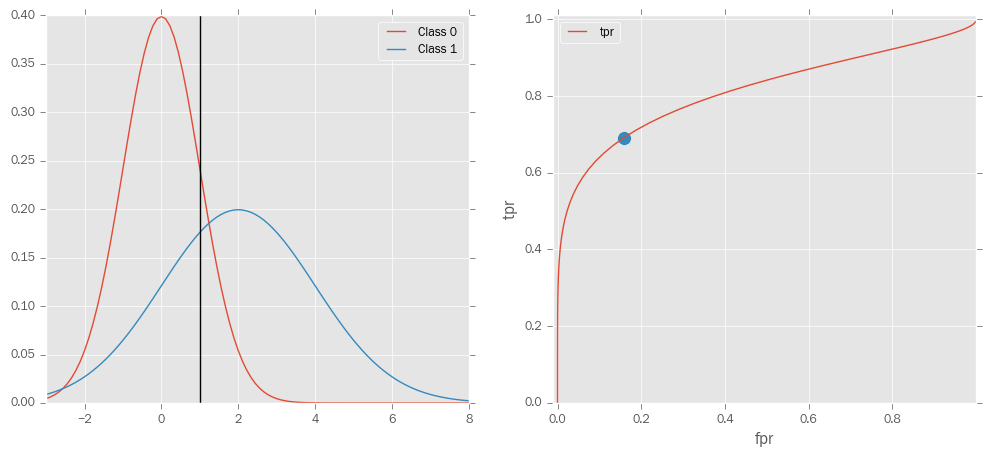

In [4]:
@interact(mean_0=(-2.0,2.0,0.1), sd_0=(1.0, 5), 
          mean_1=(2.0,4.0,0.1), sd_1=(1.0, 5), threshold=(-1, 3, 0.1))
def roc_curve(mean_0=0, sd_0=1, mean_1=2, sd_1=2, threshold=1):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    x = np.linspace(mean_0-3*sd_0, mean_1+3*sd_1, 100)
    pdf = pd.DataFrame({'Class 0': norm.pdf(x, loc=mean_0, scale=sd_0), 
                        'Class 1': norm.pdf(x, loc=mean_1, scale=sd_1)}, 
                        index=x).plot(ax=axes[0])
    roc = pd.DataFrame({'tpr': 1-norm.cdf(x, loc=mean_1, scale=sd_1),
                        'fpr': 1-norm.cdf(x, loc=mean_0, scale=sd_0)}, 
                       index=x).plot(x='fpr', y='tpr', xlim=[-0.01,1], ylim=[0,1.01], ax=axes[1]);
    axes[0].axvline(threshold, c='black')
    pd.DataFrame({'tpr': 1-norm.cdf(threshold, loc=mean_1, scale=sd_1), 
                  'fpr': 1-norm.cdf(threshold, loc=mean_0, scale=sd_0)},
                 index=[threshold]).plot.scatter(x='fpr', y='tpr', s=100, ax=axes[1])

#### Questions:
Holding all other values constant, how does AUC depend on:
- mean of class 0
- standard deviation of class 0
- mean of class 1
- standard deviation of class 1
- the threshold value

For the initial settings (mean_0=0, sd_0=1, mean_1=sd_1=2), what is the optimal threshold value, and why?

#### Answers: